In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cat-in-the-dat/test.csv
/kaggle/input/cat-in-the-dat/train.csv
/kaggle/input/cat-in-the-dat/sample_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

> **Importing the dataset and exploring it**

In [3]:
train = pd.read_csv("../input/cat-in-the-dat/train.csv")
#train.head(5)
#train.tail(5)

In [4]:
#sns.countplot(train["nom_0"])
#sns.countplot(train["nom_1"]) -scaling
#sns.countplot(train["nom_2"]) -scaling
#sns.countplot(train["nom_3"])
#sns.countplot(train["nom_4"]) -scaling
#sns.countplot(train["nom_5"]) -drop
#sns.countplot(train["nom_6"]) -drop
#sns.countplot(x = "nom_7", data = train) -drop
#sns.countplot(train["nom_8"]) -drop
#sns.countplot(train["ord_0"])
#sns.countplot(train["ord_1"]) -scaling
#sns.countplot(train["ord_2"]) -scaling
#sns.countplot(train["ord_3"]) -scaling
#sns.countplot(train["ord_4"]) -scaling
#sns.countplot(train["ord_5"]) -drop
#sns.countplot(train["month"])

In [5]:
#train = train.drop(["ord_5","nom_5","nom_6","nom_7","nom_8","nom_9"], axis = 1)

In [6]:
train.tail(5)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
299995,299995,0,0,0,T,N,Red,Trapezoid,Snake,India,...,e027decef,1,Contributor,Freezing,k,K,dh,3,8,0
299996,299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,...,80f1411c8,2,Novice,Freezing,h,W,MO,3,2,0
299997,299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,...,314dcc15b,3,Novice,Boiling Hot,o,A,Bn,7,9,1
299998,299998,0,1,0,F,Y,Green,Square,Axolotl,Costa Rica,...,ab0ce192b,1,Master,Boiling Hot,h,W,uJ,3,8,1
299999,299999,0,0,0,F,Y,Blue,Trapezoid,Dog,Russia,...,ad1af2b45,3,Contributor,Freezing,i,R,tP,1,3,0


In [7]:
train.drop("id", axis = 1, inplace = True)

In [8]:
train.head(5)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

#bin_3
l_enc = LabelEncoder()
X = train["bin_3"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"bin_3":X})
train.drop("bin_3", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,bin_3
0,0,0,0,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,...,2,Grandmaster,Cold,h,D,kr,2,2,0,1
1,0,1,0,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,...,1,Grandmaster,Hot,a,A,bF,7,8,0,1
2,0,0,0,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,...,1,Expert,Lava Hot,h,R,Jc,7,2,0,0
3,0,1,0,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,...,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1,0
4,0,0,0,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,...,1,Grandmaster,Freezing,a,R,qP,7,8,0,0


In [10]:
#bin_4
X = train["bin_4"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"bin_4":X})
train.drop("bin_4", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,...,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,bin_3,bin_4
0,0,0,0,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,...,Grandmaster,Cold,h,D,kr,2,2,0,1,1
1,0,1,0,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,...,Grandmaster,Hot,a,A,bF,7,8,0,1,1
2,0,0,0,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,...,Expert,Lava Hot,h,R,Jc,7,2,0,0,1
3,0,1,0,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,...,Grandmaster,Boiling Hot,i,D,kW,2,1,1,0,1
4,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,...,Grandmaster,Freezing,a,R,qP,7,8,0,0,0


In [11]:
#nom_0
scaler = StandardScaler()
X = train["nom_0"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_0":X})
train.drop("nom_0", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,...,ord_2,ord_3,ord_4,ord_5,day,month,target,bin_3,bin_4,nom_0
0,0,0,0,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,...,Cold,h,D,kr,2,2,0,1,1,1
1,0,1,0,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,...,Hot,a,A,bF,7,8,0,1,1,1
2,0,0,0,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,...,Lava Hot,h,R,Jc,7,2,0,0,1,0
3,0,1,0,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,...,Boiling Hot,i,D,kW,2,1,1,0,1,2
4,0,0,0,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,...,Freezing,a,R,qP,7,8,0,0,0,2


In [12]:
#nom_1
scaler = StandardScaler()
X = train["nom_1"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_1":X})
train.drop("nom_1", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,...,ord_3,ord_4,ord_5,day,month,target,bin_3,bin_4,nom_0,nom_1
0,0,0,0,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,...,h,D,kr,2,2,0,1,1,1,5
1,0,1,0,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,...,a,A,bF,7,8,0,1,1,1,4
2,0,0,0,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,...,h,R,Jc,7,2,0,0,1,0,4
3,0,1,0,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,...,i,D,kW,2,1,1,0,1,2,4
4,0,0,0,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,...,a,R,qP,7,8,0,0,0,2,4


In [13]:
#nom_2
scaler = StandardScaler()
X = train["nom_2"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_2":X})
train.drop("nom_2", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,...,ord_4,ord_5,day,month,target,bin_3,bin_4,nom_0,nom_1,nom_2
0,0,0,0,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,...,D,kr,2,2,0,1,1,1,5,5
1,0,1,0,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,...,A,bF,7,8,0,1,1,1,4,3
2,0,0,0,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,...,R,Jc,7,2,0,0,1,0,4,4
3,0,1,0,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,...,D,kW,2,1,1,0,1,2,4,5
4,0,0,0,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,...,R,qP,7,8,0,0,0,2,4,4


In [14]:
#nom_3
scaler = StandardScaler()
X = train["nom_3"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_3":X})
train.drop("nom_3", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,...,ord_5,day,month,target,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3
0,0,0,0,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,...,kr,2,2,0,1,1,1,5,5,3
1,0,1,0,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,...,bF,7,8,0,1,1,1,4,3,5
2,0,0,0,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,...,Jc,7,2,0,0,1,0,4,4,5
3,0,1,0,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,...,kW,2,1,1,0,1,2,4,5,0
4,0,0,0,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,...,qP,7,8,0,0,0,2,4,4,0


In [15]:
#nom_4
scaler = StandardScaler()
X = train["nom_4"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_4":X})
train.drop("nom_4", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,...,day,month,target,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4
0,0,0,0,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,...,2,2,0,1,1,1,5,5,3,0
1,0,1,0,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,...,7,8,0,1,1,1,4,3,5,2
2,0,0,0,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,...,7,2,0,0,1,0,4,4,5,3
3,0,1,0,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,...,2,1,1,0,1,2,4,5,0,1
4,0,0,0,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,...,7,8,0,0,0,2,4,4,0,1


In [16]:
#nom_5
scaler = StandardScaler()
X = train["nom_5"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_5":X})
train.drop("nom_5", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,...,month,target,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5
0,0,0,0,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,...,2,0,1,1,1,5,5,3,0,78
1,0,1,0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,...,8,0,1,1,1,4,3,5,2,159
2,0,0,0,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,...,2,0,0,1,0,4,4,5,3,44
3,0,1,0,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,...,1,1,0,1,2,4,5,0,1,209
4,0,0,0,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,...,8,0,0,0,2,4,4,0,1,90


In [17]:
#nom_6
scaler = StandardScaler()
X = train["nom_6"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_6":X})
train.drop("nom_6", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,...,target,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6
0,0,0,0,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,...,0,1,1,1,5,5,3,0,78,120
1,0,1,0,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,...,0,1,1,1,4,3,5,2,159,510
2,0,0,0,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,...,0,0,1,0,4,4,5,3,44,14
3,0,1,0,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,...,1,0,1,2,4,5,0,1,209,165
4,0,0,0,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,...,0,0,0,2,4,4,0,1,90,61


In [18]:
#nom_7
scaler = StandardScaler()
X = train["nom_7"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_7":X})
train.drop("nom_7", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,...,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7
0,0,0,0,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,...,1,1,1,5,5,3,0,78,120,491
1,0,1,0,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,...,1,1,1,4,3,5,2,159,510,260
2,0,0,0,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,...,0,1,0,4,4,5,3,44,14,766
3,0,1,0,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,...,0,1,2,4,5,0,1,209,165,1121
4,0,0,0,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,...,0,0,2,4,4,0,1,90,61,34


In [19]:
#nom_8
scaler = StandardScaler()
X = train["nom_8"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_8":X})
train.drop("nom_8", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,...,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8
0,0,0,0,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,...,1,1,5,5,3,0,78,120,491,1686
1,0,1,0,f83c56c21,1,Grandmaster,Hot,a,A,bF,...,1,1,4,3,5,2,159,510,260,650
2,0,0,0,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,...,1,0,4,4,5,3,44,14,766,1932
3,0,1,0,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,...,1,2,4,5,0,1,209,165,1121,629
4,0,0,0,b164b72a7,1,Grandmaster,Freezing,a,R,qP,...,0,2,4,4,0,1,90,61,34,1760


In [20]:
#nom_9
scaler = StandardScaler()
X = train["nom_9"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_9":X})
train.drop("nom_9", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,...,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9
0,0,0,0,2,Grandmaster,Cold,h,D,kr,2,...,1,5,5,3,0,78,120,491,1686,2175
1,0,1,0,1,Grandmaster,Hot,a,A,bF,7,...,1,4,3,5,2,159,510,260,650,11635
2,0,0,0,1,Expert,Lava Hot,h,R,Jc,7,...,0,4,4,5,3,44,14,766,1932,8078
3,0,1,0,1,Grandmaster,Boiling Hot,i,D,kW,2,...,2,4,5,0,1,209,165,1121,629,6056
4,0,0,0,1,Grandmaster,Freezing,a,R,qP,7,...,2,4,4,0,1,90,61,34,1760,8231


In [21]:
#ord_1
scaler = StandardScaler()
X = train["ord_1"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"ord_1":X})
train.drop("ord_1", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,ord_0,ord_2,ord_3,ord_4,ord_5,day,month,...,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1
0,0,0,0,2,Cold,h,D,kr,2,2,...,5,5,3,0,78,120,491,1686,2175,2
1,0,1,0,1,Hot,a,A,bF,7,8,...,4,3,5,2,159,510,260,650,11635,2
2,0,0,0,1,Lava Hot,h,R,Jc,7,2,...,4,4,5,3,44,14,766,1932,8078,1
3,0,1,0,1,Boiling Hot,i,D,kW,2,1,...,4,5,0,1,209,165,1121,629,6056,2
4,0,0,0,1,Freezing,a,R,qP,7,8,...,4,4,0,1,90,61,34,1760,8231,2


In [22]:
#ord_2
scaler = StandardScaler()
X = train["ord_2"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"ord_2":X})
train.drop("ord_2", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,ord_0,ord_3,ord_4,ord_5,day,month,target,...,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2
0,0,0,0,2,h,D,kr,2,2,0,...,5,3,0,78,120,491,1686,2175,2,1
1,0,1,0,1,a,A,bF,7,8,0,...,3,5,2,159,510,260,650,11635,2,3
2,0,0,0,1,h,R,Jc,7,2,0,...,4,5,3,44,14,766,1932,8078,1,4
3,0,1,0,1,i,D,kW,2,1,1,...,5,0,1,209,165,1121,629,6056,2,0
4,0,0,0,1,a,R,qP,7,8,0,...,4,0,1,90,61,34,1760,8231,2,2


In [23]:
#ord_3
scaler = StandardScaler()
X = train["ord_3"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"ord_3":X})
train.drop("ord_3", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,ord_0,ord_4,ord_5,day,month,target,bin_3,...,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3
0,0,0,0,2,D,kr,2,2,0,1,...,3,0,78,120,491,1686,2175,2,1,7
1,0,1,0,1,A,bF,7,8,0,1,...,5,2,159,510,260,650,11635,2,3,0
2,0,0,0,1,R,Jc,7,2,0,0,...,5,3,44,14,766,1932,8078,1,4,7
3,0,1,0,1,D,kW,2,1,1,0,...,0,1,209,165,1121,629,6056,2,0,8
4,0,0,0,1,R,qP,7,8,0,0,...,0,1,90,61,34,1760,8231,2,2,0


In [24]:
#ord_4
scaler = StandardScaler()
X = train["ord_4"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"ord_4":X})
train.drop("ord_4", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,ord_0,ord_5,day,month,target,bin_3,bin_4,...,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4
0,0,0,0,2,kr,2,2,0,1,1,...,0,78,120,491,1686,2175,2,1,7,3
1,0,1,0,1,bF,7,8,0,1,1,...,2,159,510,260,650,11635,2,3,0,0
2,0,0,0,1,Jc,7,2,0,0,1,...,3,44,14,766,1932,8078,1,4,7,17
3,0,1,0,1,kW,2,1,1,0,1,...,1,209,165,1121,629,6056,2,0,8,3
4,0,0,0,1,qP,7,8,0,0,0,...,1,90,61,34,1760,8231,2,2,0,17


In [25]:
#ord_5
scaler = StandardScaler()
X = train["ord_5"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"ord_5":X})
train.drop("ord_5", axis = 1, inplace = True)
train = pd.concat([train,X_df], axis = 1)
train.head(5)

,bin_0,bin_1,bin_2,ord_0,day,month,target,bin_3,bin_4,nom_0,...,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
0,0,0,0,2,2,2,0,1,1,1,...,78,120,491,1686,2175,2,1,7,3,136
1,0,1,0,1,7,8,0,1,1,1,...,159,510,260,650,11635,2,3,0,0,93
2,0,0,0,1,7,2,0,0,1,0,...,44,14,766,1932,8078,1,4,7,17,31
3,0,1,0,1,2,1,1,0,1,2,...,209,165,1121,629,6056,2,0,8,3,134
4,0,0,0,1,7,8,0,0,0,2,...,90,61,34,1760,8231,2,2,0,17,158


In [26]:
X_t = train.drop("target", axis = 1).values
X_t = scaler.fit_transform(X_t)
#print(X_t)
Y_t = train["target"].values
#print(Y_t)

In [27]:
from xgboost import XGBClassifier

rs = 2
X_train, X_dev, Y_train, Y_dev = train_test_split(X_t,Y_t, test_size = 0.2, random_state = rs)

In [28]:
classifier = XGBClassifier(learning_rate=0.05,n_estimators=50000,seed=2019,reg_alpha=5,eval_metric='auc',tree_method='gpu_hist')
classifier.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_dev, Y_dev)],early_stopping_rounds=50, verbose=50)

[0]	validation_0-auc:0.645515	validation_1-auc:0.648135
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[50]	validation_0-auc:0.732759	validation_1-auc:0.733806
[100]	validation_0-auc:0.748362	validation_1-auc:0.74898
[150]	validation_0-auc:0.756232	validation_1-auc:0.756039
[200]	validation_0-auc:0.760834	validation_1-auc:0.760288
[250]	validation_0-auc:0.763924	validation_1-auc:0.763099
[300]	validation_0-auc:0.766641	validation_1-auc:0.765673
[350]	validation_0-auc:0.768538	validation_1-auc:0.767333
[400]	validation_0-auc:0.770134	validation_1-auc:0.768788
[450]	validation_0-auc:0.771351	validation_1-auc:0.769758
[500]	validation_0-auc:0.772545	validation_1-auc:0.770736
[550]	validation_0-auc:0.773513	validation_1-auc:0.771512
[600]	validation_0-auc:0.774375	validation_1-auc:0.772118
[650]	validation_0-auc:0.775195	validation_1-auc:0.772699
[700]	validation_0-auc:0.77598	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=5, reg_lambda=1, scale_pos_weight=1, seed=2019,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

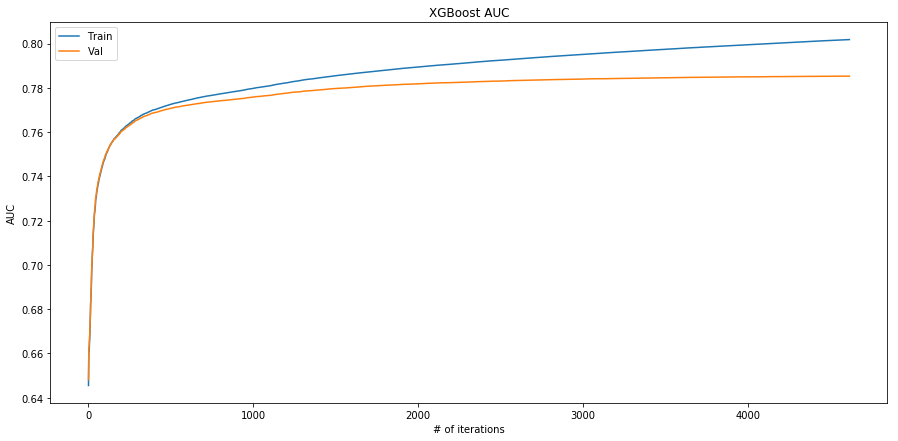

In [29]:
results = classifier.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

# plotting the loss
plt.figure(figsize=(15, 7))
plt.plot(x_axis, results['validation_0']['auc'], label='Train')
plt.plot(x_axis, results['validation_1']['auc'], label='Val')
plt.legend()
plt.ylabel('AUC')
plt.xlabel('# of iterations')
plt.title('XGBoost AUC')
plt.show()

In [30]:
Y_hat = classifier.predict(X_dev)
print(accuracy_score(Y_dev, Y_hat))

0.7537666666666667


In [31]:
test_orig = pd.read_csv("../input/cat-in-the-dat/test.csv")

In [32]:
test = test_orig.copy()
test.drop("id", axis = 1, inplace = True)

#bin_3
l_enc = LabelEncoder()
X = test["bin_3"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"bin_3":X})
test.drop("bin_3", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#bin_4
l_enc = LabelEncoder()
X = test["bin_4"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"bin_4":X})
test.drop("bin_4", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#nom_0
scaler = StandardScaler()
X = test["nom_0"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_0":X})
test.drop("nom_0", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#nom_1
scaler = StandardScaler()
X = test["nom_1"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_1":X})
test.drop("nom_1", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#nom_2
scaler = StandardScaler()
X = test["nom_2"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_2":X})
test.drop("nom_2", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#nom_3
scaler = StandardScaler()
X = test["nom_3"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_3":X})
test.drop("nom_3", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#nom_4
scaler = StandardScaler()
X = test["nom_4"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_4":X})
test.drop("nom_4", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#nom_5
scaler = StandardScaler()
X = test["nom_5"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_5":X})
test.drop("nom_5", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#nom_6
scaler = StandardScaler()
X = test["nom_6"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_6":X})
test.drop("nom_6", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#nom_7
scaler = StandardScaler()
X = test["nom_7"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_7":X})
test.drop("nom_7", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#nom_8
scaler = StandardScaler()
X = test["nom_8"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_8":X})
test.drop("nom_8", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#nom_9
scaler = StandardScaler()
X = test["nom_9"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"nom_9":X})
test.drop("nom_9", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#ord_1
scaler = StandardScaler()
X = test["ord_1"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"ord_1":X})
test.drop("ord_1", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#ord_2
scaler = StandardScaler()
X = test["ord_2"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"ord_2":X})
test.drop("ord_2", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#ord_3
scaler = StandardScaler()
X = test["ord_3"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"ord_3":X})
test.drop("ord_3", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#ord_4
scaler = StandardScaler()
X = test["ord_4"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"ord_4":X})
test.drop("ord_4", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
#test.head(5)

#ord_5
scaler = StandardScaler()
X = test["ord_5"].values
X = l_enc.fit_transform(X)
X_df = pd.DataFrame(data = {"ord_5":X})
test.drop("ord_5", axis = 1, inplace = True)
test = pd.concat([test,X_df], axis = 1)
test.head(5)

,bin_0,bin_1,bin_2,ord_0,day,month,bin_3,bin_4,nom_0,nom_1,...,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
0,0,0,1,2,5,11,1,1,0,5,...,8,320,371,1367,2789,4,5,9,15,95
1,0,0,0,1,7,5,1,0,2,2,...,151,53,79,596,1879,3,4,11,0,61
2,1,0,1,2,1,12,0,1,0,2,...,84,61,164,1570,5123,1,2,0,6,172
3,0,0,1,1,2,3,1,1,2,3,...,173,334,199,107,8365,0,4,1,16,135
4,0,1,1,3,4,11,0,0,2,4,...,197,305,751,2155,6903,2,4,11,22,157


In [33]:
X_test = test.values
#print(X_test)
X_test = scaler.fit_transform(X_test)
#print(X_test)

In [34]:
Y_test = classifier.predict_proba(X_test, ntree_limit=classifier.best_ntree_limit)[:, 1]
print(Y_test)

[0.27108672 0.6325029  0.12930685 ... 0.12389614 0.47774372 0.25059947]


> **Creating a dataframe and saving the output in a csv file**

In [35]:
Y_df = pd.DataFrame(data = {'target':Y_test})
sub = pd.read_csv("../input/cat-in-the-dat/sample_submission.csv")
sub.drop("target", axis = 1, inplace = True)
test_final = pd.concat([sub, Y_df], axis = 1)
test_final.head(5)

,id,target
0,300000,0.271087
1,300001,0.632503
2,300002,0.129307
3,300003,0.436799
4,300004,0.761691


In [36]:
test_final.to_csv("submission.csv", index = False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 